![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 1: kNN and Linear Regression

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 55

<hr style="height:2.4pt">

In [2]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [3]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

### Names of the people who worked on this homework together
#### Mayank Hirpara - mayank.h@somaiya.edu
#### Sumit Kumar - sumit05796@gmail.com

In [4]:
!pip install seaborn

In [5]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part A: k-NN and Linear Regression [30 points total] </h2>    <br />


### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.




<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 1:   Exploratory Data Analysis (EDA) [10 points total]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** [2pts] Which variables are quantitative, and which are categorical? 

**1.2** [2pts] What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** [2pts] What is the range of Kilometers that the cars have?

**1.4** [4pts] The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
**Note**: Label your axes.
</div>

## Solutions 

### 1.1

**Which variables are quantitative, and which are categorical?**

In [7]:
# your code here
df=pd.read_csv("data/car_dekho_full.csv")
print (df.head())
print (df.info())

   Year  Current_Selling_Price    MRP  Kms_Driven
0  2016                   5.25   5.70        3493
1  2005                   3.51  13.70       75000
2  2010                   0.31   1.05      213000
3  2006                   2.10   7.60       50456
4  2005                   0.20   0.57       55000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   601 non-null    int64  
 1   Current_Selling_Price  601 non-null    float64
 2   MRP                    601 non-null    float64
 3   Kms_Driven             601 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.9 KB
None


In [41]:
# Answer: Categorical and Quantitative
answer_1_1_categorical = "Year" # MRP can be categorical in the case where we might calssify them by range.
answer_1_1_numerical = "Current_Selling_Price, MRP, Kms_Driven"
print ("Categorical variables are:", answer_1_1_categorical)
print ("Quantitative variables are:",answer_1_1_numerical)

Categorical variables are: Year
Quantitative variables are: Current_Selling_Price, MRP, Kms_Driven


### 1.2

**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [8]:
# Name your variables as mean_csp, mean_mrp, std_csp, std_mrp

# your code here

# Calculating Mean of Current_Selling_Price and MRP
mean_csp=df.describe()['Current_Selling_Price']['mean']
mean_mrp=df.describe()['MRP']['mean']

#Calculating the Standard Deviation of Current_Selling_Price and MRP
std_csp=df.describe()['Current_Selling_Price']['std']
std_mrp=df.describe()['MRP']['std']

# end your code here 


print ("The mean Current Selling Price is", mean_csp,"lakhs")
print ("The mean MRP is", mean_mrp,'lakhs')
print ("The Standard Deviation of Current Selling Price is", std_csp)
print ("The Standard Deviation of MRP is", std_mrp)

The mean Current Selling Price is 4.393078202995008 lakhs
The mean MRP is 6.911552412645585 lakhs
The Standard Deviation of Current Selling Price is 4.518314989263965
The Standard Deviation of MRP is 6.480120956252664


### 1.3

**What is the range of Kilometers that the cars have?**

In [42]:
# your code here
min_km=min(df['Kms_Driven'].values)
max_km=max(df['Kms_Driven'].values)
range_kms=(min_km, max_km)
print ("The range of Kilometers that the cars have", range_kms, "kilometers")
# Alternatively
range_kms_2 = max_km - min_km
print ("The range of Kilometers that the cars have", range_kms_2, "kilometers")

The range of Kilometers that the cars have (500, 213000) kilometers
The range of Kilometers that the cars have 212500 kilometers


### 1.4

**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

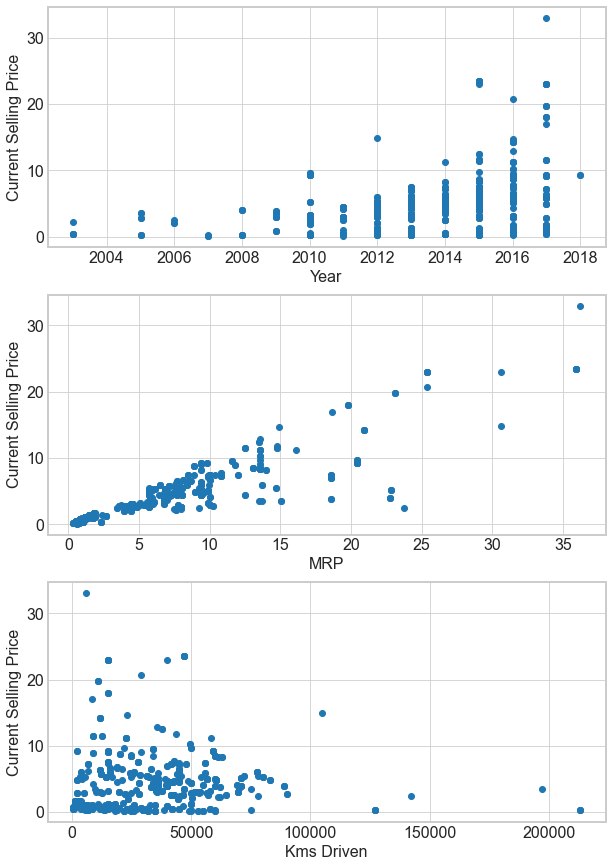

In [10]:
# your code here
fig, ax = plt.subplots(3, figsize=(10, 15))
ax[0].scatter(x = df['Year'], y = df['Current_Selling_Price'])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Current Selling Price")

ax[1].scatter(x = df['MRP'], y = df['Current_Selling_Price'])
ax[1].set_xlabel("MRP")
ax[1].set_ylabel("Current Selling Price")

ax[2].scatter(x = df['Kms_Driven'], y = df['Current_Selling_Price'])
ax[2].set_xlabel("Kms Driven")
ax[2].set_ylabel("Current Selling Price")
plt.show()

**Your answer here**
*MRP*

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 2:   k-Nearest Neighbors  [10 points total]</b>
<br /><br />
We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.
<br /><br />

**2.1** [6pts] In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
<br /><br />
    
INSTRUCTIONS:
<br />
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
<br />
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,60,100$. 
<br />
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
<br />
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
<br />
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
<br />
- Find the best model based on the test $MSE$ values.
<br />
- Evaluate and report the $R^2$ of the best model.

<br /><br />
**2.2** [4pts] Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
<br /><br />
- How does the value of $k$ affect the fitted model?
<br />
- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
<br />
- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
<br />
    
    </div>

### Solutions

### 2.1
In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

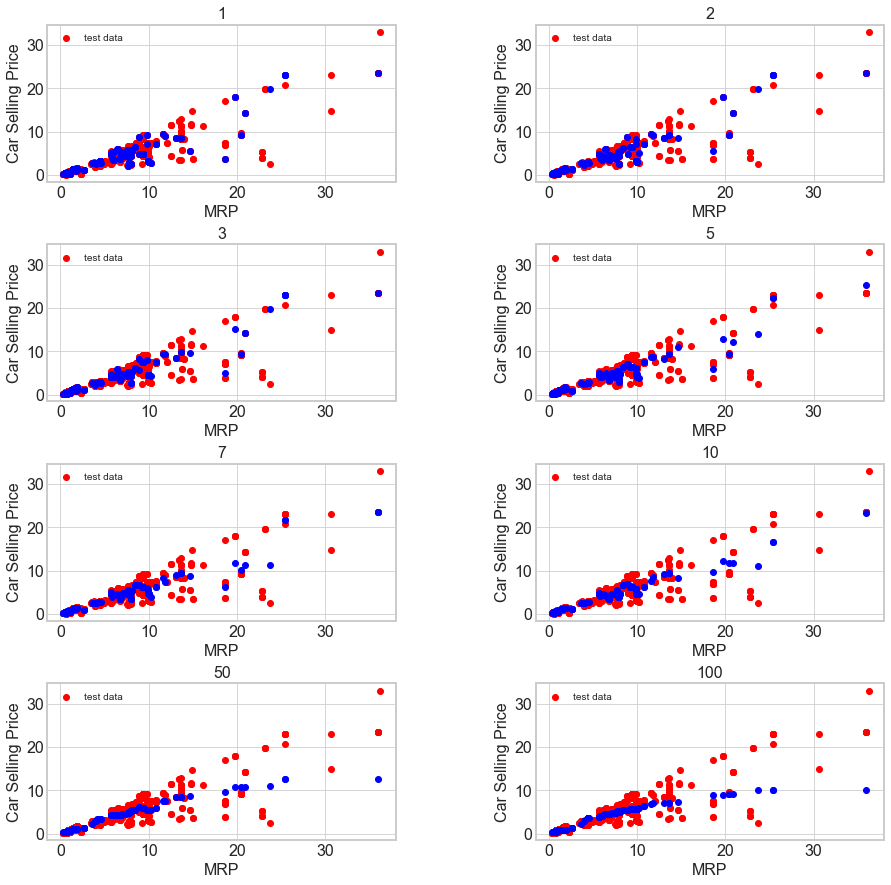

In [43]:
#Choosing your predictor and response variable

# your code here
x = df[['MRP']]
y = df['Current_Selling_Price']
# end of your code here 


##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=109)
# end of your code here  


## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,60,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend 
# your code here 

training_error, validation_error = [],[]
k_list = [1,2,3,5,7,10,50,100]

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    train_mse= mean_squared_error(y_train,y_train_pred)
    test_mse = mean_squared_error(y_val,y_val_pred)
    training_error.append(train_mse)
    validation_error.append(test_mse)

    # Plotting
    
    ax = fig.add_subplot(4, 2, int(k_list.index(k_value))+1)
    ax.scatter(x,y, color='r', label='Actual Data')
    ax.scatter(x_val, y_val_pred, color='b', label='Predicted Data')
    ax.set_xlabel("MRP")
    ax.set_ylabel("Car Selling Price")
    ax.set_title(k_value)
    ax.legend(["test data"],loc = 'upper left',fontsize=10)
    #ax.show()


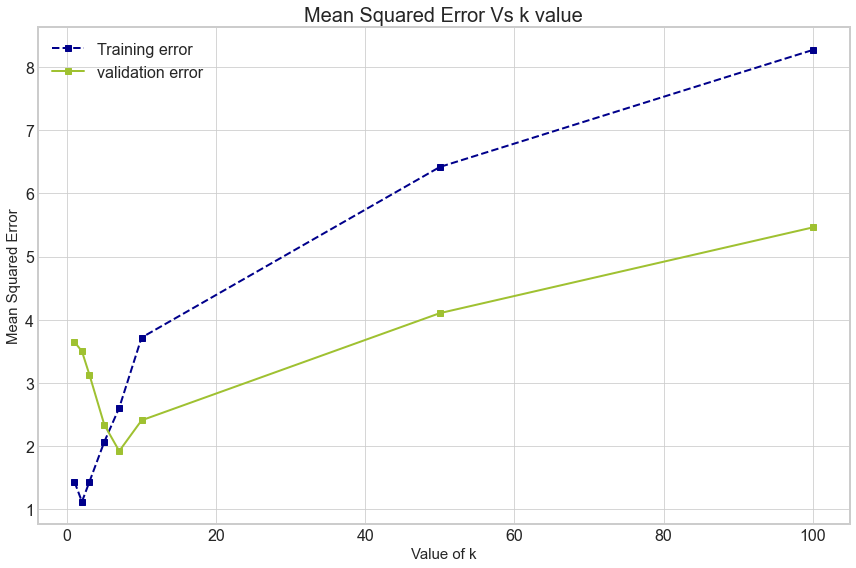

In [26]:
# Now make the MSE plots
# your code here
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(k_list, training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
ax.plot(k_list, validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )
ax.set_xlabel('Value of k',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error Vs k value',fontsize=20)
plt.tight_layout()


In [44]:
# Find the best model
# your code here
min_mse = min(validation_error)
best_model = validation_error.index(min_mse)
print("The best model is for k =",best_model)
print("MSE for k=4 is",min_mse)

The best model is for k = 4
MSE for k=4 is 1.9218710771725909


In [45]:
##Compute the R-squared for the best model
# your code here
# bmodel = KNeighborsRegressor(n_neighbors=int(best_model))
# bmodel.fit(x_train,y_train)
# by_val_pred = model.predict(x_val)
# r_squared = r2_score(y_val, by_val_pred)

r_squared = r2_score(y_val, y_val_pred)

print("The R-squared for the best model=",r_squared)

The R-squared for the best model= 0.6608979054228944


### 2.2

**Your answer here**

**a) How does the value of $k$ affect the fitted model?**
<br />
Initially, as the value of $k$ increases, the validation error decreases. But after a point, when the model starts to overfit the training dataset, as the value of $k$ increases, the validation error also increases.

**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**
<br />
The model will be a horizontal line equal to the average of all the points. This model would perform worse than a model achieved by linear regression.

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />
Yes, the training and test $MSE$ plots exhibit different trends. As we can observe, the $MSE$ for the training dataset tends to decrease even if the validation error has began to increase. This is observed because of the random selection of the data from the dataset, and a new random state will surely provide different trends in these two plots.

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**
The Training of the model depends on the training dataset, and choosing a different random state changes the data used to train the model. This results in the MSE vs. K-value plot change and the optimum K value and minimum MSE for the validation dataset.


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 3:  Simple Linear Regression   [10 points total]</b>
<br /><br />

**3.1** [5pts] We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
<br /><br />
- You will use the same 75% training and 25% testing split of the data, using the random_state = 106. 
<br />
- Run a Linear Regression model.
<br />
- Report the slope/coefficient and intercept values for the fitted linear model.
<br />
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
<br />
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis. Discuss the shape of the plot and what it shows for the quality of the model.(you can try that for test set as well)
<br /><br />

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
<br /><br />
**3.2** [5pts] Discuss your results by answering the following questions.  
<br />
- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 
<br />
- What does the sign of the slope of the fitted linear model convey about the data? 
<br />
- Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br /><br />
    </div>


### Solutions

### 3.1
**Predict the selling price**

In [32]:
# your code here
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=106)

The coefficient for the  model= [0.61565992]
The intercept for the  model= 0.11236987692104439
The train mse for the  model= 4.713332797955166
The test  mse for the  model= 3.136167052174168
The R-squared for the  model= 0.8052856808135865


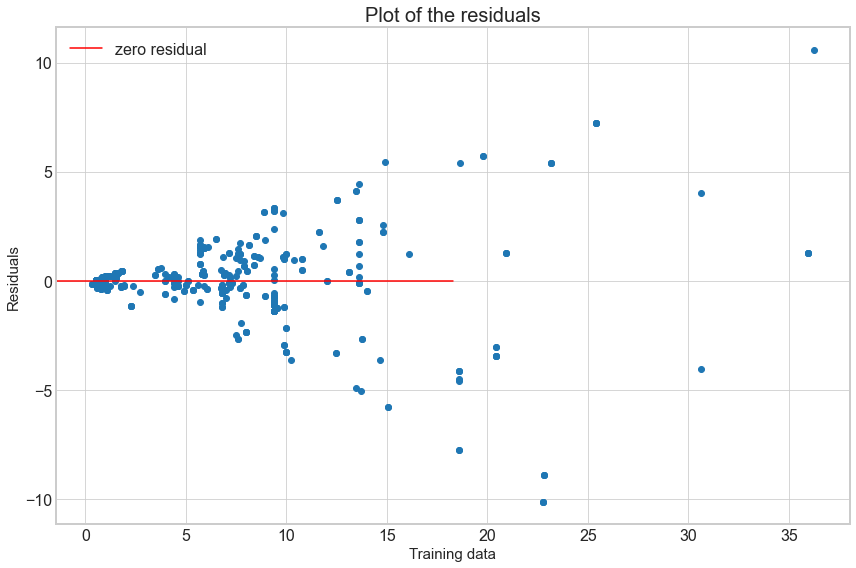

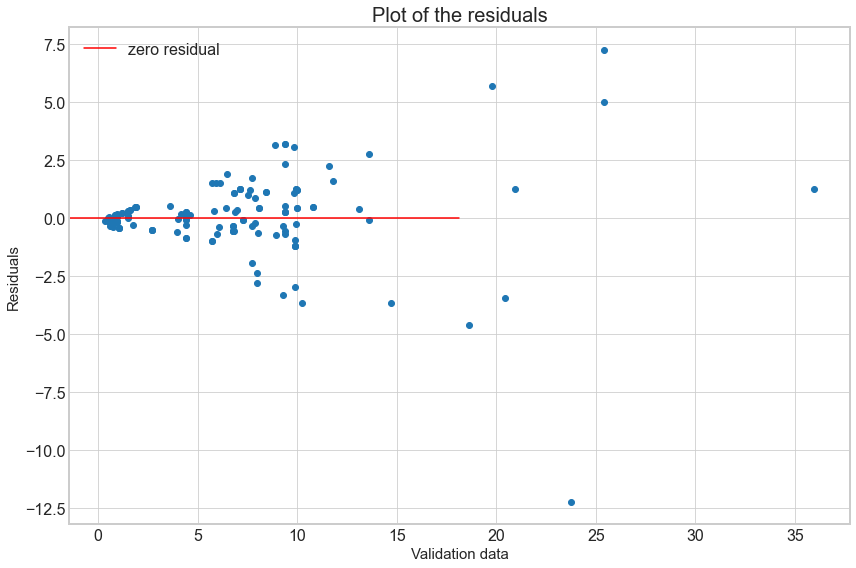

In [46]:
## Fit a linear model to the train data

# your code here

model = LinearRegression()
model.fit(x_train, y_train)

coeff = model.coef_
intercept = model.intercept_

y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

train_mse= mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_val,y_val_pred)

r_squared = r2_score(y_val, y_val_pred)

print("The coefficient for the  model=",coeff)
print("The intercept for the  model=",intercept)
print("The train mse for the  model=",train_mse)
print("The test  mse for the  model=",test_mse)
print("The R-squared for the  model=",r_squared)

# end of your code here 


## Plot the **residuals** 
# your code here 

# Plot the residuals for the training dataset
residuals = y_train - y_train_pred
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x_train, residuals)
ax.axhline(0, 0, 0.5, color = 'r', label = f'zero residual')
ax.set_xlabel('Training data',fontsize=15)
ax.set_ylabel('Residuals',fontsize=15)
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Plot of the residuals',fontsize=20)
plt.tight_layout()

# Plot the residuals for the validation dataset
residuals = y_val - y_val_pred
fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(x_val, residuals)
ax.axhline(0, 0, 0.5, color = 'r', label = f'zero residual')
ax.set_xlabel('Validation data',fontsize=15)
ax.set_ylabel('Residuals',fontsize=15)
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Plot of the residuals',fontsize=20)
plt.tight_layout()

### 3.2

**Your answer here**

**a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?**
<br />
The $MSE$ score obtained is greater thatn the best test $MSE$ value obtained with k-NN regression above.

**b) What does the sign of the slope of the fitted linear model convey about the data?**
<br />
It conveys that with increase in the value of predictor will indicate an increase in the value of the predicted variable. i.e., If $MRP$ increases then, $Current_Selling_Price$ will also increase.

**c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />**
Based on the residual plot, it is clear that there is some linear relation underlying the trend of the data, but the data is also scattered above and below the prection line. This indicates that there must be other relations in the data as well. My assumption is with the KMs driven and the Year of Manufacture also plays a role in determining the predicted variable. Clearly the Linear Model underfits the data to a certain extent.


**Your answer here**


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<h2 style="color:black;background-color:#F6E6E2"> Part Β :  Multi-Linear Regression [25 points total] </h2><br />


### Problem Description: 

Analysis of publically available profiles on **simplymarry** to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the **simplymarry** site.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish Medium ': 4, 'Wheatish ':3, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are unlikely to hide any deeply held cultural or sociological biases in order to be perceived as being politically correct. This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias.

This is a dataset designed to make you think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as do these biases reduce among more educated users, or more urban users?  

In [47]:
# Read the file named "Income_prediction.csv"

df = pd.read_csv('data/Income_prediction.csv')

# See what's in the data
df.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
3,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10
4,30,0,62,72,29.032,2,2,1,1,0,1,1,1,3,1,2,0,5,1,3,20833,6


<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">

<b> Question 5:   Using Data science to learn more about Indian society  [15 points total]</b>
<br />
First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.
<br /><br />
Answer the below questions using plots & simple statistics
<br /><br />
**5.1** [2pt] Is there a gender-bias for income of participants?
<br /><br />
**5.2** [2pt] Is there a correlation between income and skin complexion?
<br /><br />
**5.3** [2pt] Is there a discernable trend in the incomes of participants from different regions/cities?
<br /><br />
**5.4** [1pt] Is there a clear trend between BMI and the income?
<br /><br />
**5.5** [2pt] Does the level of education show a clear trend with income?
<br /><br />
**5.6** [2pt] Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
<br /><br />
**5.7** [2pt] Is the income lower or high for those living in 'nuclear' families?
<br /><br />
**5.8** [2pt] Is being 'Manglik' negatively affect the income of participants?

### Solutions

### 5.1

In [61]:
# your code here

# Gender male is '1' and the mean of their income is,
male_income = np.sort(df.loc[df["gender"] == 1].income)
male_mean_income = np.mean(male_income)
male_median = np.median(male_income)
num_male_income_plus = len(male_income) // 2

# Gender Female is '0' and the mean of their income is,
female_income = df.loc[df["gender"] == 0].income
female_mean_income = np.mean(female_income)
female_median = np.median(female_income)
num_female_income_plus = len(female_income) // 2

# Gender-bias test 1
if male_mean_income != female_mean_income:
    print("Gender-bias Test-1 = TRUE")
else:
    print("Gender-bias Test-1 = FALSE")

# Gender-bias test 1
if male_median != female_median:
    print("Gender-bias Test-1 = TRUE")
else:
    print("Gender-bias Test-1 = FALSE")

# Gender-bias test 1
if num_male_income_plus != num_female_income_plus:
    print("Gender-bias Test-1 = TRUE")
else:
    print("Gender-bias Test-1 = FALSE")

print()
print("Mean income of Male population:", male_mean_income)
print("Mean income of Female population:", female_mean_income)
print()
print("Median of income of Male population:", male_median)
print("Median of income of Female population:", female_median)
print()
print("Male population higher than median:", num_male_income_plus)
print("Female population higher than median:", num_female_income_plus)

Gender-bias Test-1 = TRUE
Gender-bias Test-1 = TRUE
Gender-bias Test-1 = TRUE

Mean income of Male population: 13849.099282296651
Mean income of Female population: 8450.57527226137

Median of income of Male population: 7500.0
Median of income of Female population: 5833.0

Male population higher than median: 2926
Female population higher than median: 780


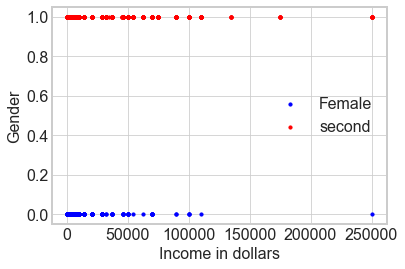

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(female_income,np.zeros(len(female_income)), s=10, c='b', label='Female')
ax.scatter(male_income,np.ones(len(male_income)), s=10, c='r', label='second')
ax.set_xlabel('Income in dollars')
ax.set_ylabel('Gender')
plt.legend()
plt.show()

## Alternatively
# plt.scatter(df["gender"], df["income"])
# fig.xlabel('Gender')
# fig.ylabel('Income in dollars')

As we can see, that there is a clear correlation between Gender and Income.

### 5.2

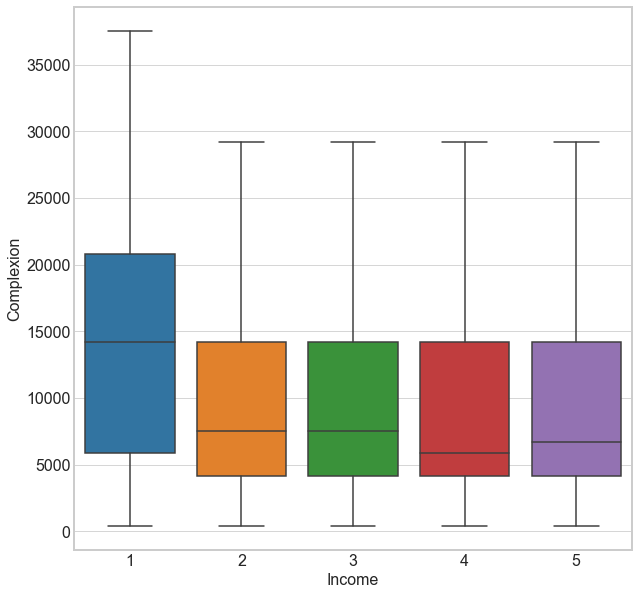

In [77]:
# you code here 
## Correlation between income and skin complexion
# skin_complx = df['complexion']
# income = df['income']
# correlation = income.corr(skin_complx.all())
# print(correlation)

fig, ax = plt.subplots(figsize=(10,10))

df_new = df[['complexion', 'income']]
sns.boxplot(x = 'complexion', y = 'income', data = df_new, showfliers = False)

ax.set_xlabel('Income')
ax.set_ylabel('Complexion')

plt.show()

It is clear that people with very fair skin complexion are gaining more income that the rest of the population. This indicates that there is a positive correlation between income and skin complexion.

### 5.3

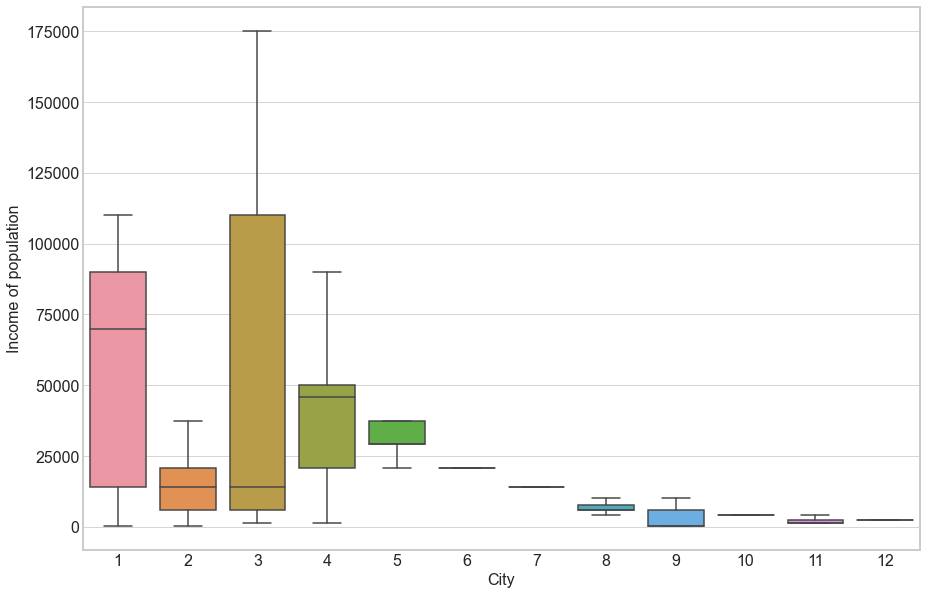

In [79]:
# your code here
fig, ax = plt.subplots(figsize=(15,10))

df_new = df[['city', 'income']]
sns.boxplot(x = 'city', y = 'income', data = df_new, showfliers = False)

ax.set_xlabel('City')
ax.set_ylabel('Income of population')

plt.show()

There is a clear correlation betwween City and Income of the population

### 5.4

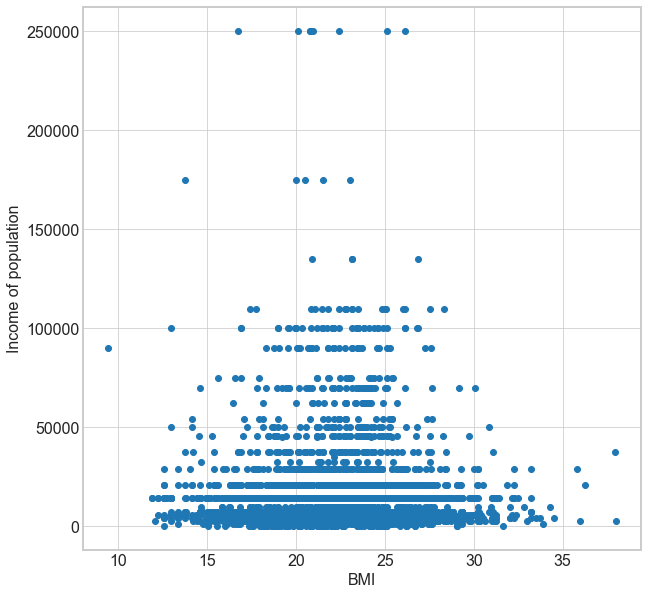

In [80]:
# your code here
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['bmi'], df['income'])
ax.set_xlabel('BMI')
ax.set_ylabel('Income of population')

plt.show()

It is clear that outperformers having extreme BMI have lower salaries than the those with normal BMI in the population.

### 5.5

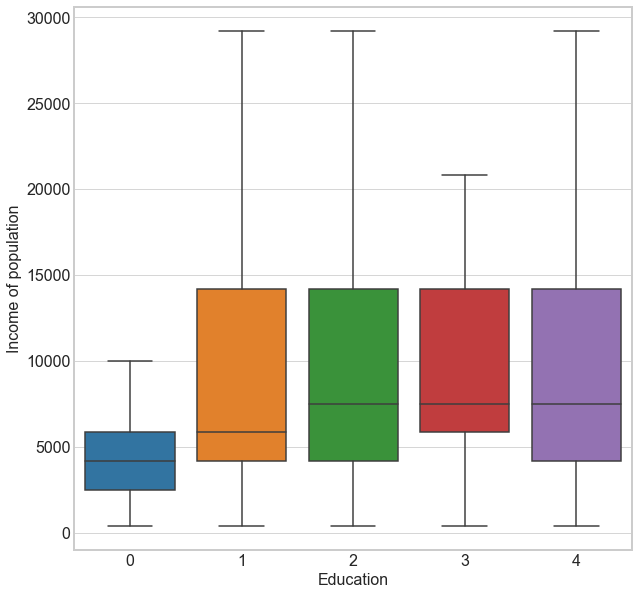

In [81]:
# your code here
fig, ax = plt.subplots(figsize=(10,10))

df_new = df[['education', 'income']]
sns.boxplot(x = 'education', y = 'income', data = df_new, showfliers = False)

ax.set_xlabel('Education')
ax.set_ylabel('Income of population')

plt.show()


There is a correlation between the educated and the uneducated or people who have only completed high school. But the correlation with the other categories is low.

### 5.6

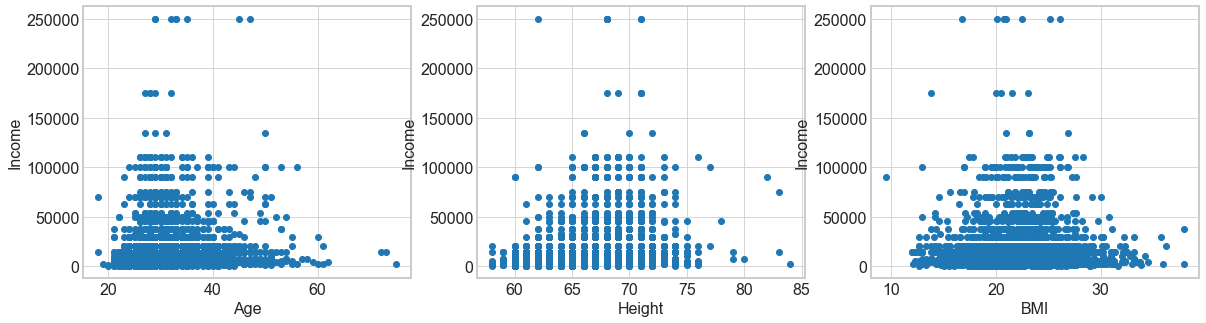

In [83]:
# your code here
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].scatter(df['age'], df['income'])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Income')

ax[1].scatter(df['height'], df['income'])
ax[1].set_xlabel('Height')
ax[1].set_ylabel('Income')

ax[2].scatter(df['bmi'], df['income'])
ax[2].set_xlabel('BMI')
ax[2].set_ylabel('Income')

plt.show()

### 5.7

Mean income of 'does not matter' family_type population is 14366.72
Mean income of 'Nuclear' family_type population is 13887.406311637082
Mean income of 'Joint Family' family_type population is 11150.937246331565
Mean income of 'Others' family_type population is 14211.91472868217


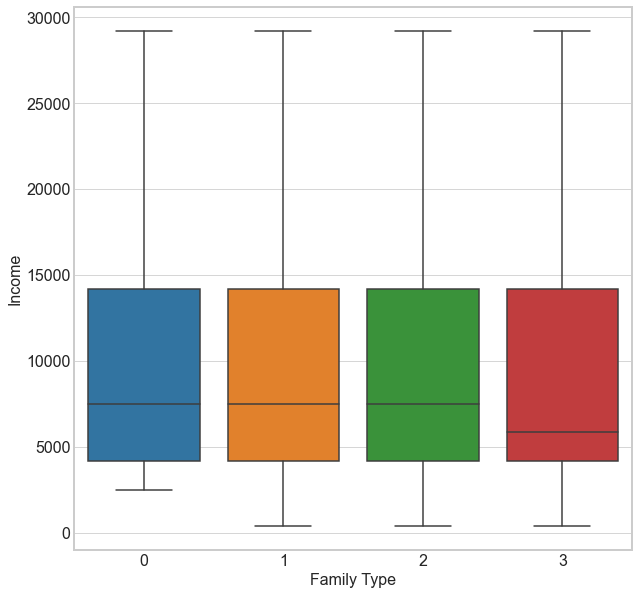

In [88]:
# your code here

# Income data for family_type "Doesn't Matter" == 0
mean_income_dm = np.mean(df.loc[df['family_type'] == 0].income)

# Income data for family_type "Nuclear" == 1
mean_income_nu = np.mean(df.loc[df['family_type'] == 1].income)

# Income data for family_type "Joint Family" == 2
mean_income_jo = np.mean(df.loc[df['family_type'] == 2].income)

# Income data for family_type "Others" == 3
mean_income_ot = np.mean(df.loc[df['family_type'] == 3].income)

print("Mean income of 'does not matter' family_type population is {}".format(mean_income_dm))
print("Mean income of 'Nuclear' family_type population is {}".format(mean_income_nu))
print("Mean income of 'Joint Family' family_type population is {}".format(mean_income_jo))
print("Mean income of 'Others' family_type population is {}".format(mean_income_ot))

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'family_type', y = 'income', data = df[['family_type', 'income']], showfliers = False)
ax.set_xlabel('Family Type')
ax.set_ylabel('Income')
plt.show()

The mean income of 'Nuclear' family_type is higher than 'Joint Family' and lower than 'Others

### 5.8

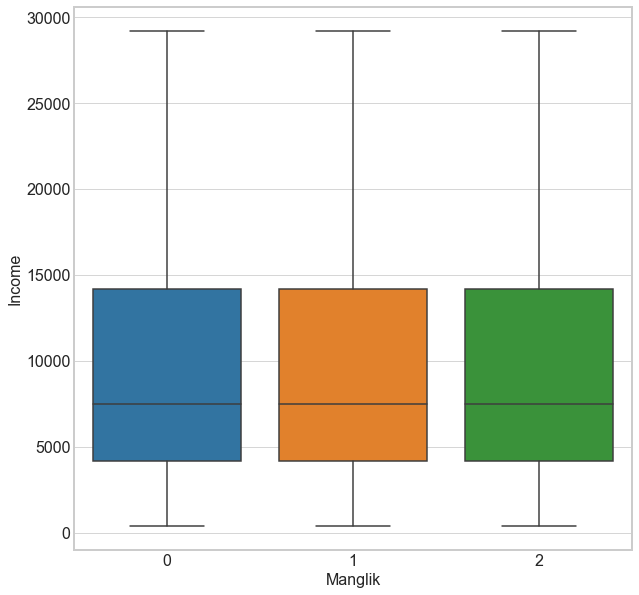

In [89]:
# your code here
fig, ax = plt.subplots(figsize=(10,10))

df_new = df[['manglik', 'income']]
sns.boxplot(x = 'manglik', y = 'income', data = df_new, showfliers = False)

ax.set_xlabel('Manglik')
ax.set_ylabel('Income')

plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#F6E6E2">
<b> Question 6:  Calculate the Gini Index  [10 points total]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.
<br /><br />
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
<br /><br />
**6.2** Compare your gini index with other countries

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated gini index value for this dataset, what is your conclusion on the income disparity in the three countries?

### Solutions

### 6.1

In [91]:
# your code here
incm = df['income']
incm_sort = np.sort(incm) # For i is the rank in ascending order

# Calculating the Gini coefficient
num = []
den = []
for i in range(len(incm_sort)):
    n = ((2*i)-len(incm_sort)-1)*incm_sort[i]
    d = incm_sort[i]
    num.append(n)
    den.append(d)
    
gini_indx = (np.sum(num))/(len(incm_sort)*(np.sum(den)))
                           
print(gini_indx)

0.4941561348985677


### 6.2

In [94]:
# your code here
if gini_indx < 0.6:
    print('Gini Index of population is better than that of South Africa.')
elif gini_indx == 0.6: # math.iscose()
    print('Gini Index of population is the same as that of South Africa.')
else:
    print('Gini Index of population is higher that that of South Africa.')
    
if gini_indx < 0.25:
    print('Gini Index of population is better than that of Ukrain.')
elif gini_indx == 0.25: # math.iscose()
    print('Gini Index of population is the same as that of Ukrain.')
else:
    print('Gini Index of population is higher that that of Ukrain.')

Gini Index of population is better than that of South Africa.
Gini Index of population is higher that that of Ukrain.


The economic condition of the population as compared to South Africa is relatively balanced.